<a href="https://colab.research.google.com/github/piyushkchaudhari/CAPSTONE-PROJECT-REGRESSION-Bike-Share-Demand-Prediction-/blob/main/CAPSTONE_PROJECT_REGRESSION(Bike_Share_Demand_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`BIKE SHARE DEMAND PREDICTION `**


## Project Type - Regression

## Contribution - Individual

## **Project Summary -**

## I decide to do Bike Share Demand prediction project.this dataset contain 8760 rows and 14 columns and output/Target veriable name is rentald bike count.Then i check the distribution of output veriable.So i ralized our output veriable is normal right scewed so i decide to use transformation i use two transfromation log10 and sqrt. sqroot transformation gives good result compare to log10 transformation.Then i check the correlation of all numeric feature with each other.Then remove the columns having higher vif and lower correlation with the target column name rentald bike count. then i check distribution of categorical features . then i am convertion categorical columns into numerical using label encoding .

## **GitHub Link:**
https://github.com/piyushkchaudhari/CAPSTONE-PROJECT-REGRESSION-Bike-Share-Demand-Prediction-

## **Problem Statement**

## Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## **Importing the libraries**

In [1]:
# IMPORTIGN LIBRARY
import numpy as np
import pandas as pd
from numpy import math
import calendar

# visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

# null value visualization Library
import missingno as msno

# Model Testing Library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Variance Inflation Factor Library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine Learning Library
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from scipy.stats import kde
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import ExtraTreesRegressor

## **Dataset Loading**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/Almabetter/Machine Learning /SeoulBikeData.csv'
df=pd.read_csv(path,encoding="ISO-8859-1")

## **Dataset First View**

In [4]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

## **Understanding Your Variables**

### Date : year-month-day

### Rented Bike count - Count of bikes rented at each hour

### Hour - Hour of he day

### Temperature-Temperature in Celsius

### Humidity - %

### Windspeed - m/s

### Visibility - 10m

### Dew point temperature - Celsius

### Solar radiation - MJ/m2

### Rainfall - mm

### Snowfall - cm

###Seasons - Winter, Spring, Summer, Autumn

###Holiday - Holiday/No holiday

###Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)


## **Dataset Rows & Columns count**

In [6]:
df.shape

(8760, 14)

## **Dataset Information**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### **About dataset:**
This dataset contain information about rental bike . this dataset contain 8760 rows and 14 columns.


## **Missing Values/Null Values**

In [8]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
df.duplicated().sum()

0

<Axes: >

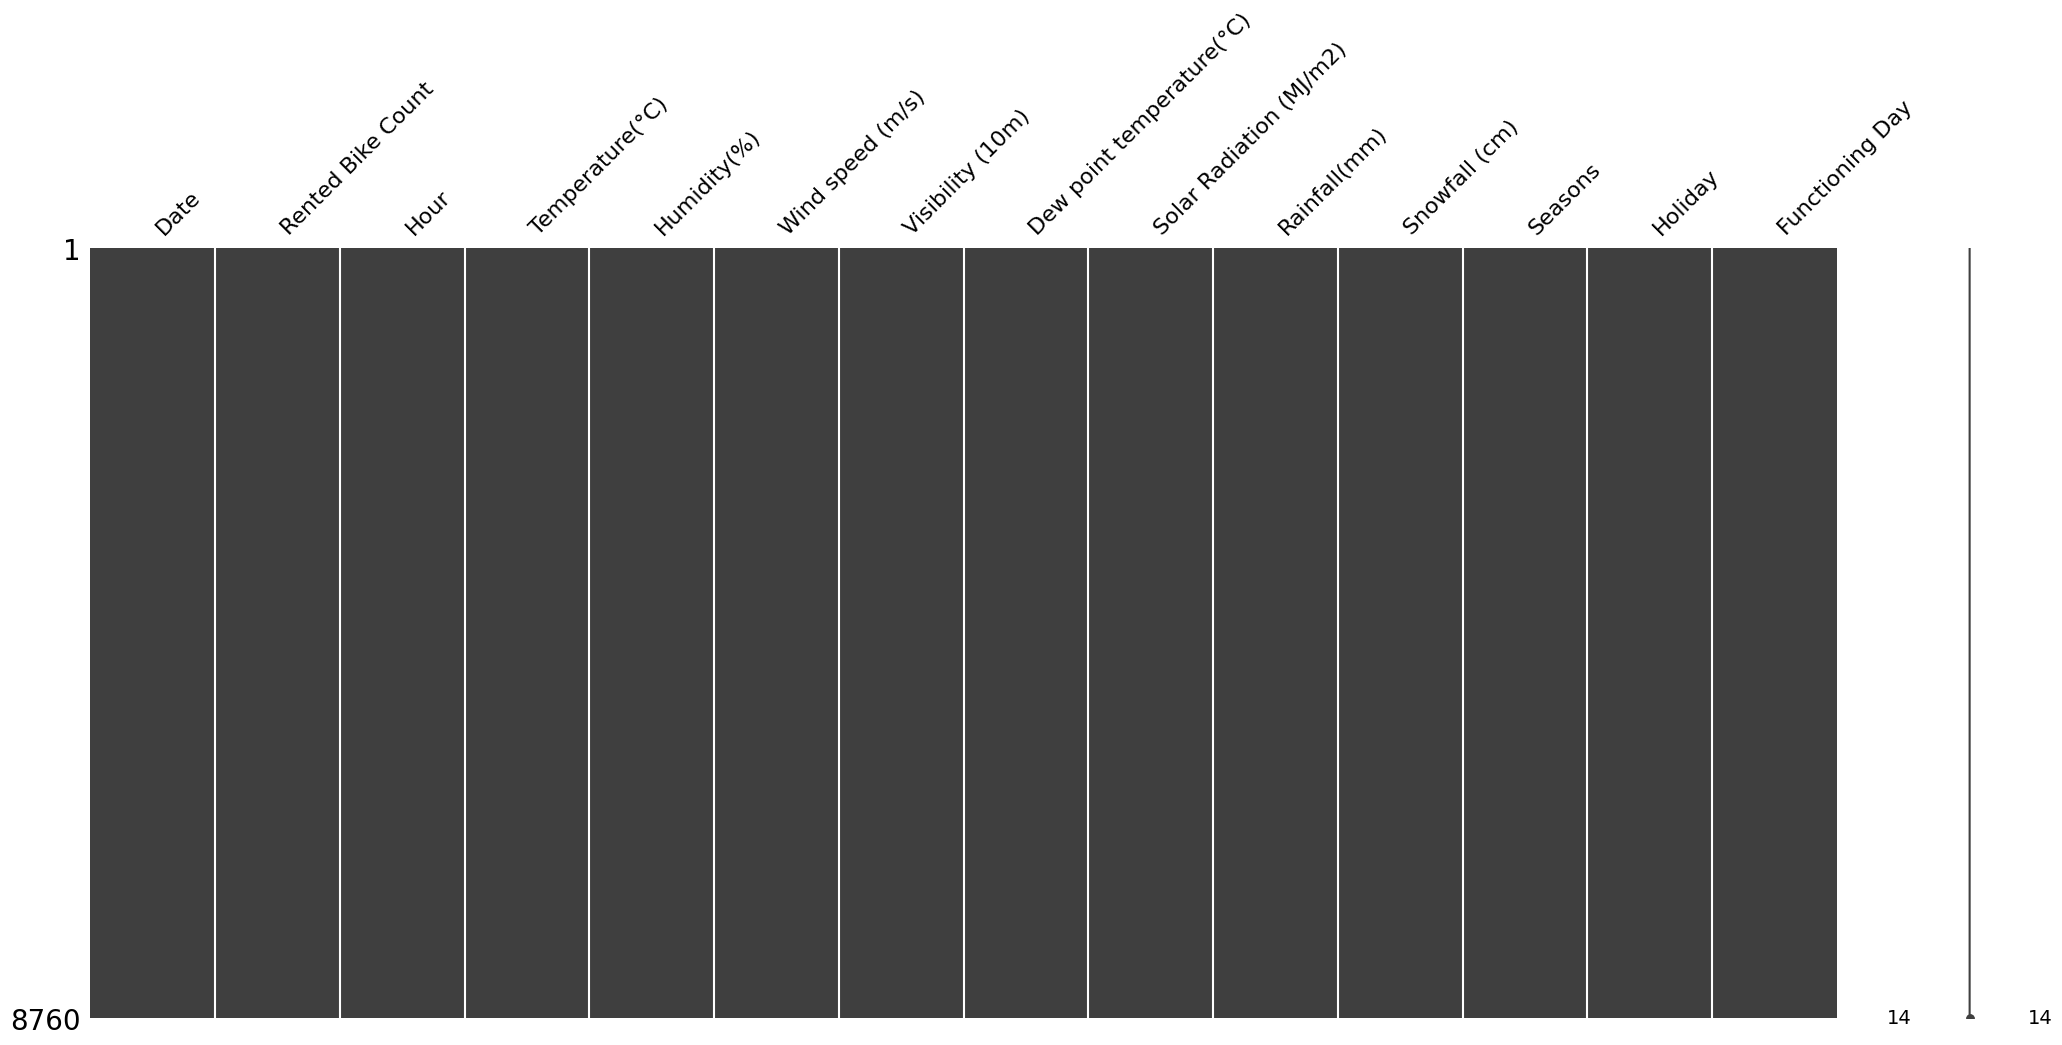

In [10]:
msno.matrix(df)

## **Check Unique Values for each variable.**

In [11]:
df.nunique(dropna = True).sort_values(ascending=False)

Rented Bike Count            2166
Visibility (10m)             1789
Dew point temperature(°C)     556
Temperature(°C)               546
Date                          365
Solar Radiation (MJ/m2)       345
Humidity(%)                    90
Wind speed (m/s)               65
Rainfall(mm)                   61
Snowfall (cm)                  51
Hour                           24
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## **Exploratory Data Analysis**

In [12]:

df.describe(include='all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

In [13]:
eda=df.copy()
eda.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [14]:
eda['Date']=pd.to_datetime(eda['Date'])

<ipython-input-14-ac10b30dc8d6>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  eda['Date']=pd.to_datetime(eda['Date'])


# which season is good for our business

In [15]:
season=eda.groupby('Seasons')['Rented Bike Count'].sum()

Text(0.5, 1.0, 'bikes counts per season')

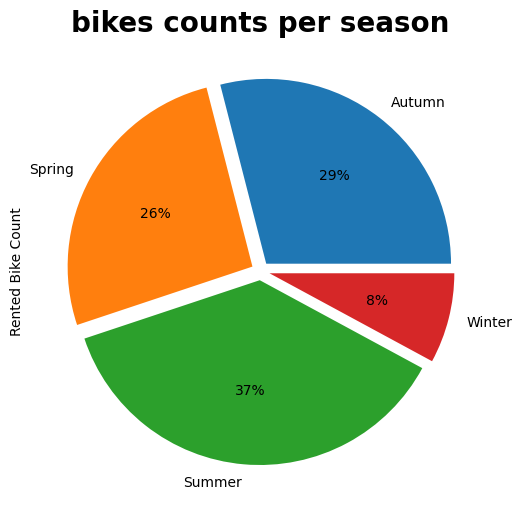

In [16]:
season.plot.pie(autopct='%1.0f%%',figsize=(6,6),explode =[0.05]*4)
plt.title('bikes counts per season',fontweight="bold", size=20)

### **insights:**
### *It seems summer season is good for our business

### *only winter season is not good for our bisiness

# what is a average of rented bike for per month.

In [17]:
eda['month'] = eda['Date'].apply(lambda x : x.month)
eda['month'] = eda['month'].apply(lambda x: calendar.month_abbr[x])
month=eda.groupby('month')['Rented Bike Count'].mean()

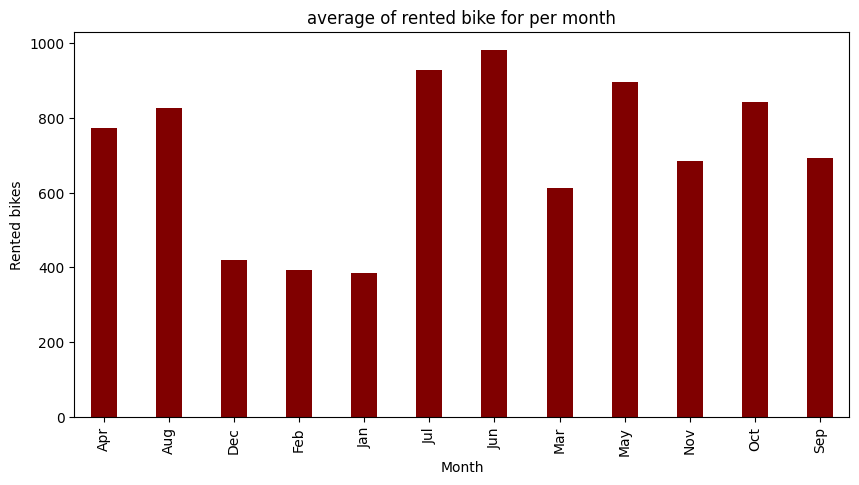

In [18]:
fig = plt.figure(figsize = (10, 5))
 # creating the bar plot
month.plot.bar( color ='maroon',
        width = 0.4)
plt.xlabel("Month")
plt.ylabel("Rented bikes")
plt.title("average of rented bike for per month")
plt.show()

### **insights:**
### *It seems Aug,Jul,Jun,May and Oct moths are the highest averages for rented bike 
### * It seems Dec,Feb,Jan months are the lowest average


# At what time of the day is the demand for our rented bikes high?

In [19]:
hour=eda.groupby('Hour').agg({'Rented Bike Count':'mean'})
l=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
hour['hours']=l
hour.set_index('hours',inplace=True)

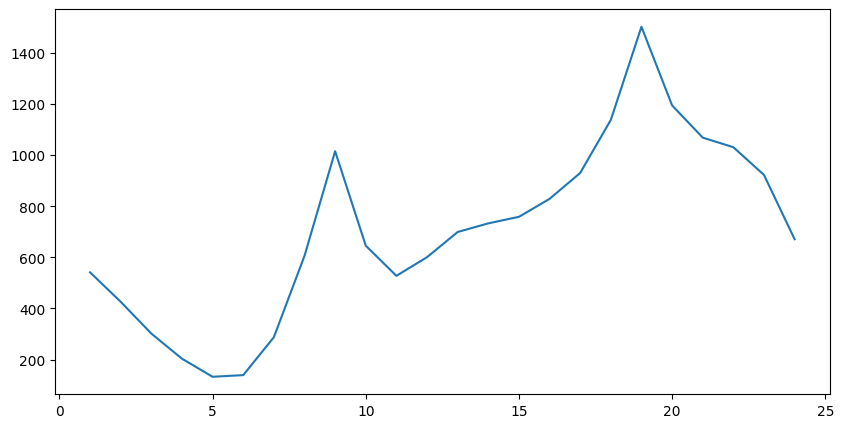

In [20]:
fig = plt.figure(figsize = (10, 5))
plt.plot(hour)

# show the graph
plt.show()

### **insights:**
## * It seems that our rented bike demand is increasing from 8 to 12 pm

# How do holiday affect the business ?

In [21]:

holiday=eda.groupby('Holiday')['Rented Bike Count'].mean()

Text(0.5, 1.0, 'bikes counts per season')

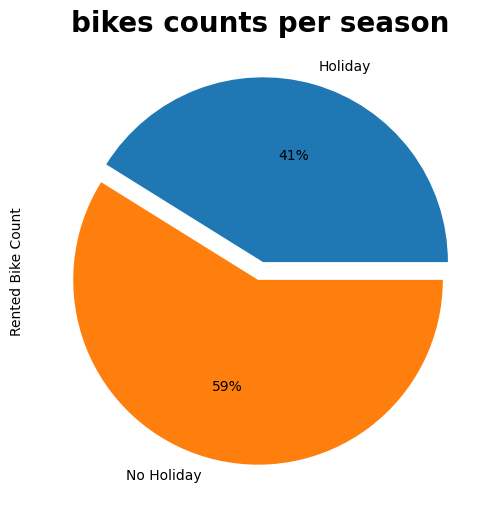

In [22]:
holiday.plot.pie(autopct='%1.0f%%',figsize=(6,6),explode =[0.05]*2)
plt.title('bikes counts per season',fontweight="bold", size=20)

### **insights:**
### holiday doesn't make much of an impact on our business .


In [23]:
ds=df.copy()

<ipython-input-24-b1752c304bdf>:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(ds['Rented Bike Count'], shade=True, bw=0.5, color="black")
<ipython-input-24-b1752c304bdf>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ds['Rented Bike Count'], shade=True, bw=0.5, color="black")


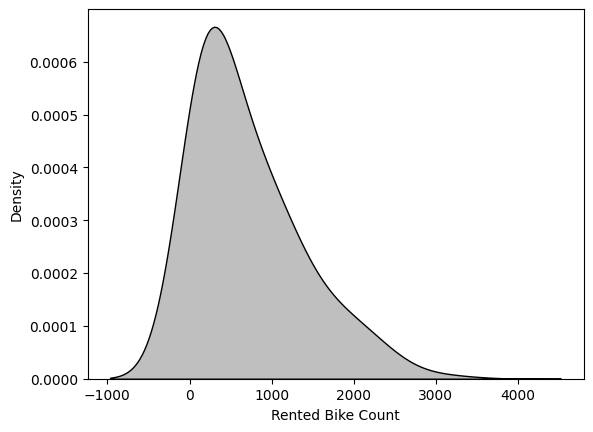

In [24]:

# Make default density plot
sns.kdeplot(ds['Rented Bike Count'], shade=True, bw=0.5, color="black")
plt.show()

### Using log10 transformation

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-25-771fc34142b8>:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(np.log10(ds['Rented Bike Count']), shade=True, bw=0.5, color="black")
<ipython-input-25-771fc34142b8>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.log10(ds['Rented Bike Count']), shade=True, bw=0.5, color="black")


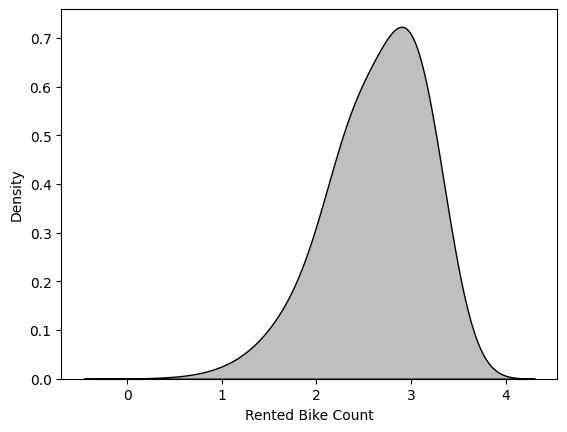

In [25]:
sns.kdeplot(np.log10(ds['Rented Bike Count']), shade=True, bw=0.5, color="black")
plt.show()

### Using Sqroot transformation

<ipython-input-26-e4a7d2fff626>:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(np.sqrt(ds['Rented Bike Count']), shade =True, bw=0.5, color="black")
<ipython-input-26-e4a7d2fff626>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.sqrt(ds['Rented Bike Count']), shade =True, bw=0.5, color="black")


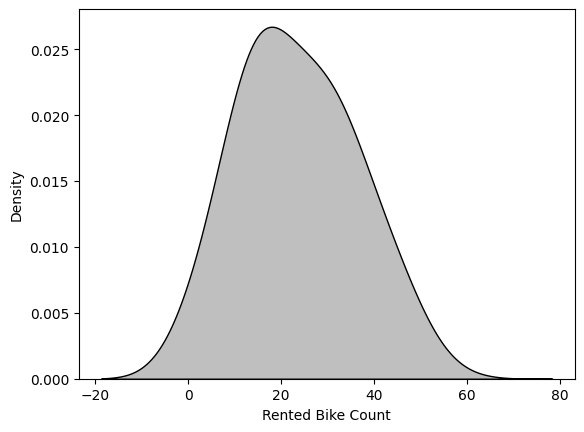

In [26]:
sns.kdeplot(np.sqrt(ds['Rented Bike Count']), shade =True, bw=0.5, color="black")
plt.show()

### :- sqroot transformation gives good result compate to log10 transformation . 

## **Feature Engineering**

In [27]:
df['Date']=pd.to_datetime(df['Date'])

<ipython-input-27-182e23b44254>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])


In [28]:
df['Date']=pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)

In [29]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
0           0.0            0.0  Winter  No Holiday             Yes      1   
1           0.0            0.0  Winter  No Holiday             Yes      1   
2           0.0            0.0  Winter  No Holiday             Yes      1   
3           0.0            0.0  Winter  No Holiday             Yes      1   
4           0.0            0.0  Winter  No Holiday             Yes      1   

   weekdays_weekend  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [30]:
numfeature=df.describe().columns

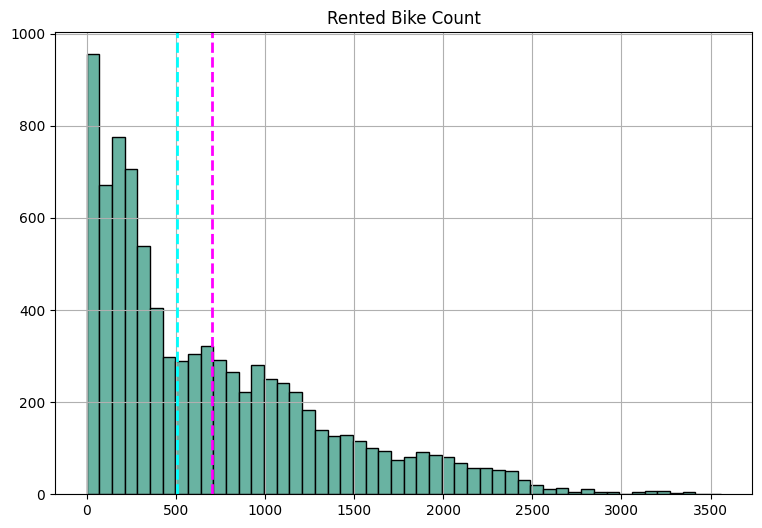

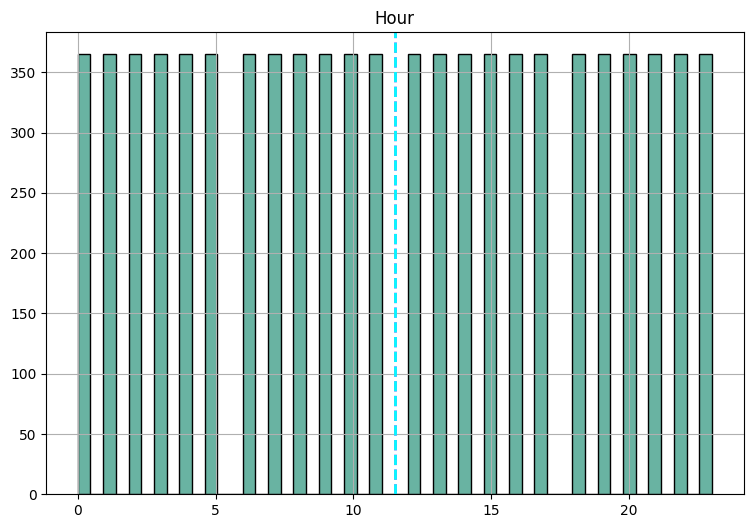

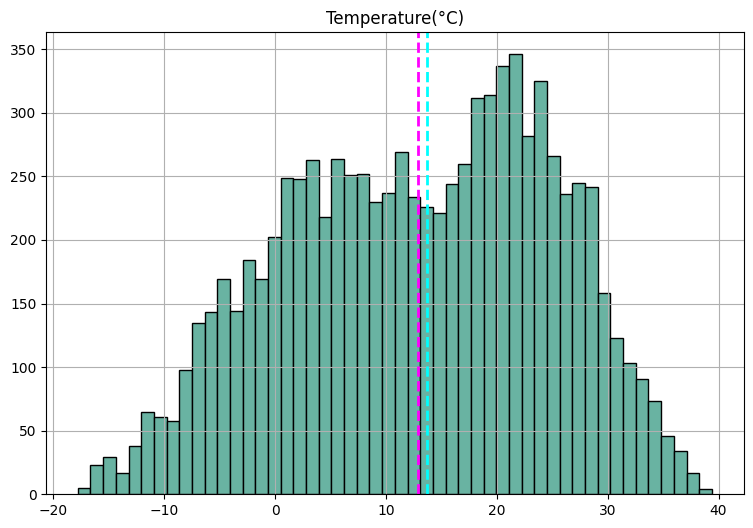

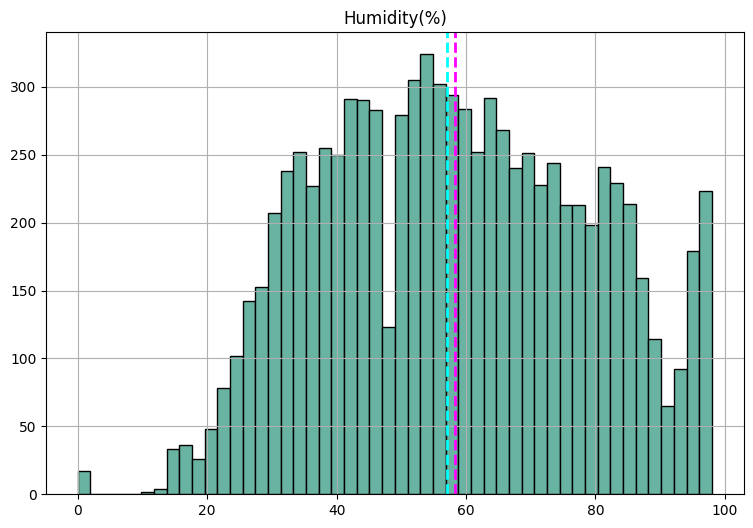

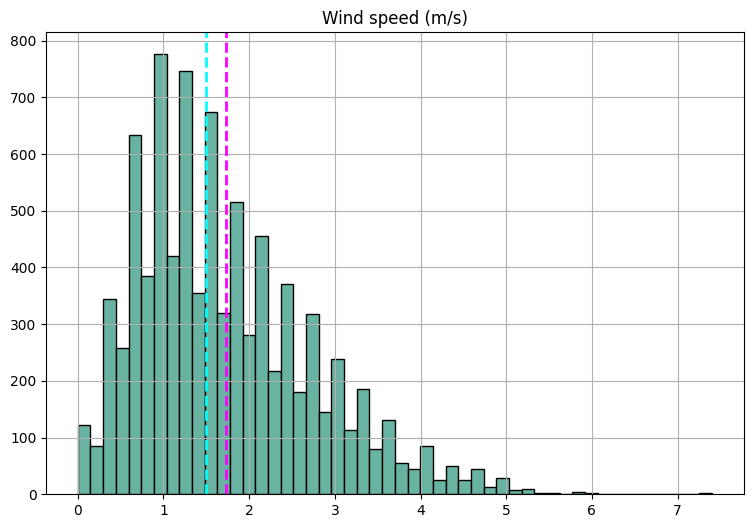

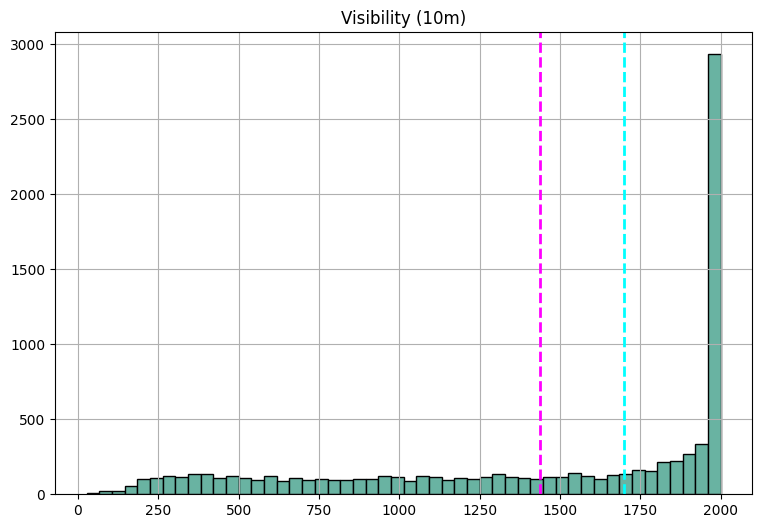

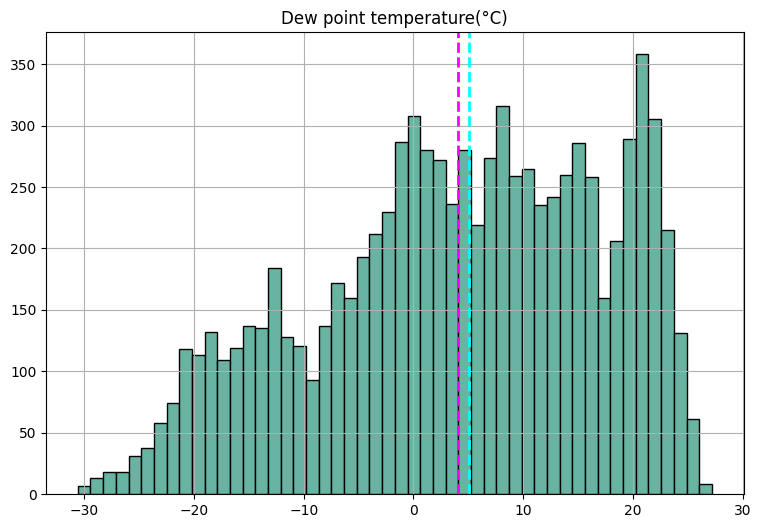

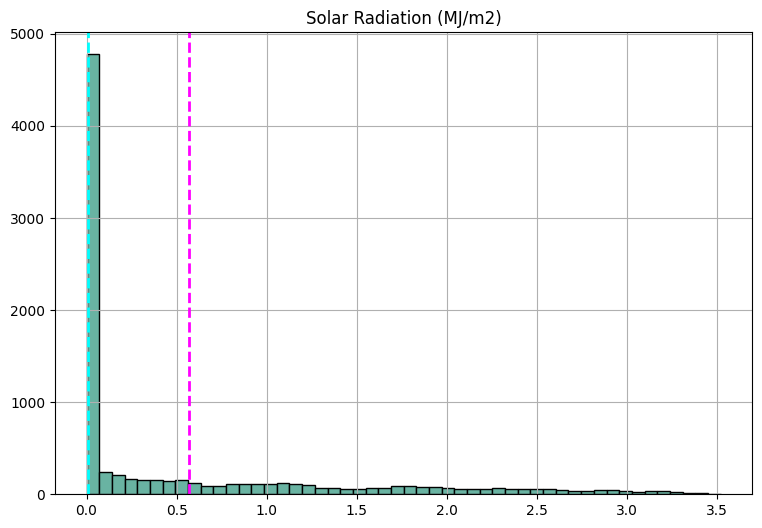

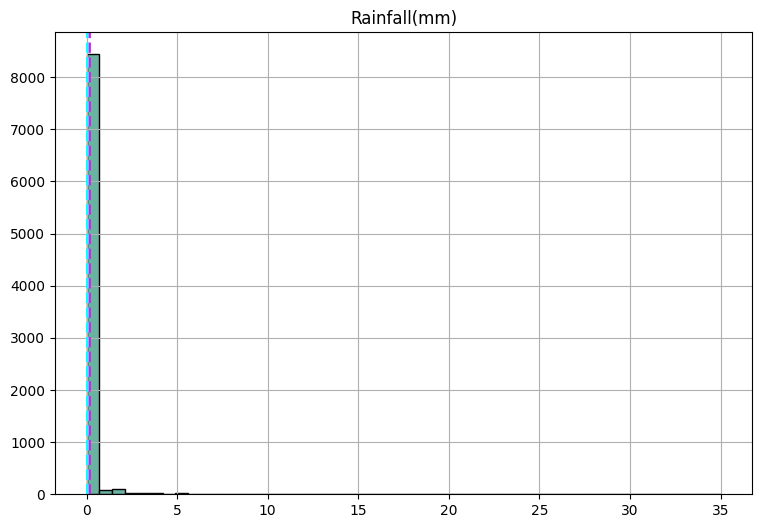

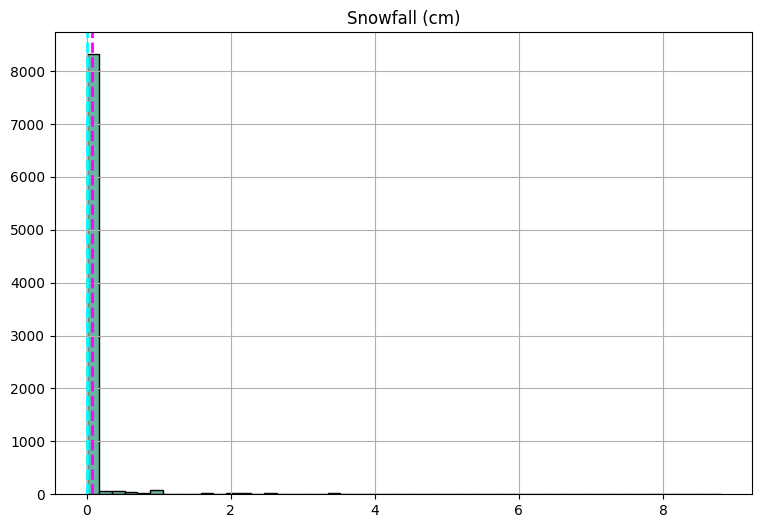

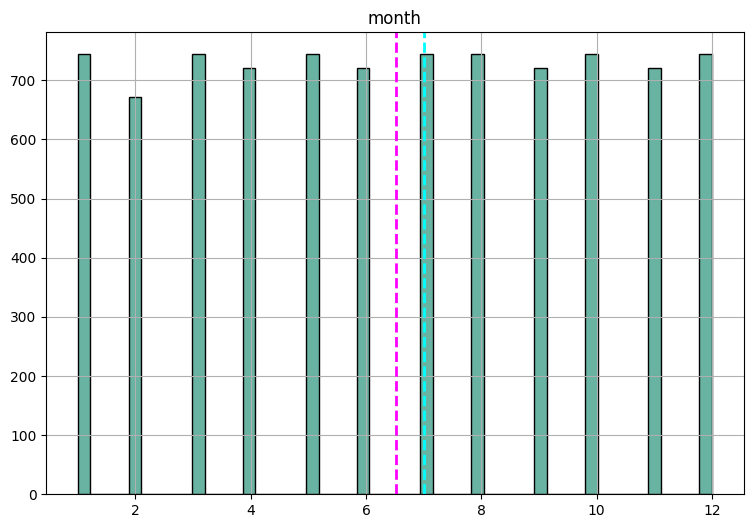

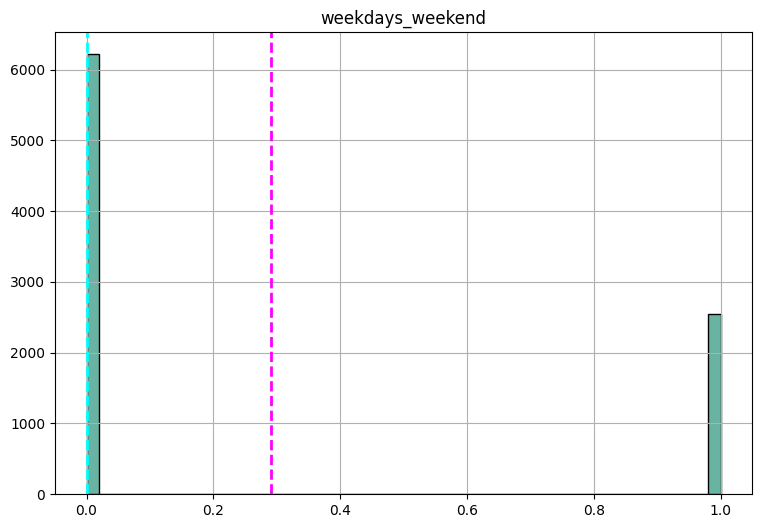

In [31]:
for i in numfeature:

  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  feature = df[i]
  feature.hist(bins=50, ax = ax,edgecolor="black", color="#69b3a2")
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(i)
plt.show()

## **Handling Multicollinearity**

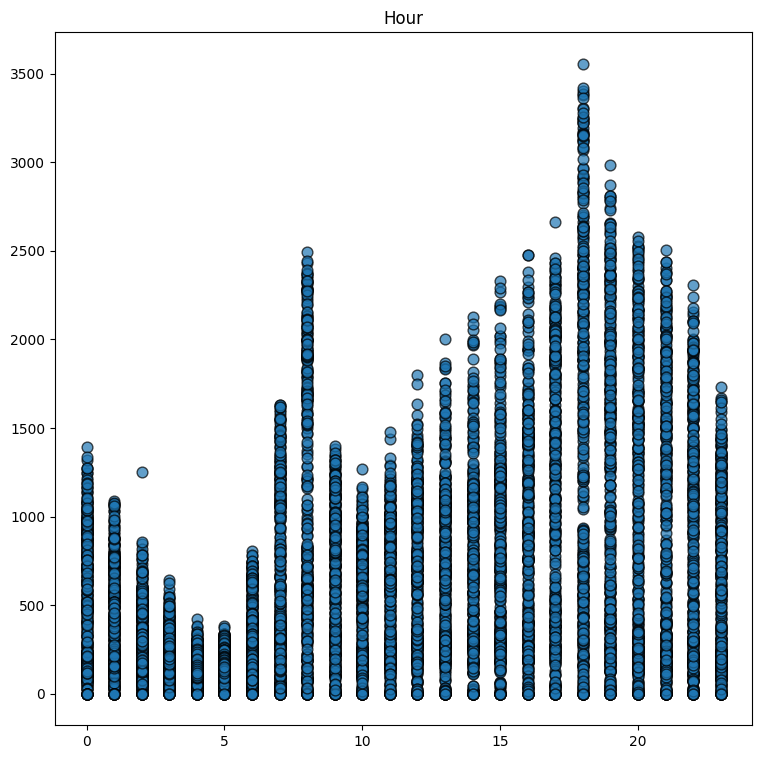

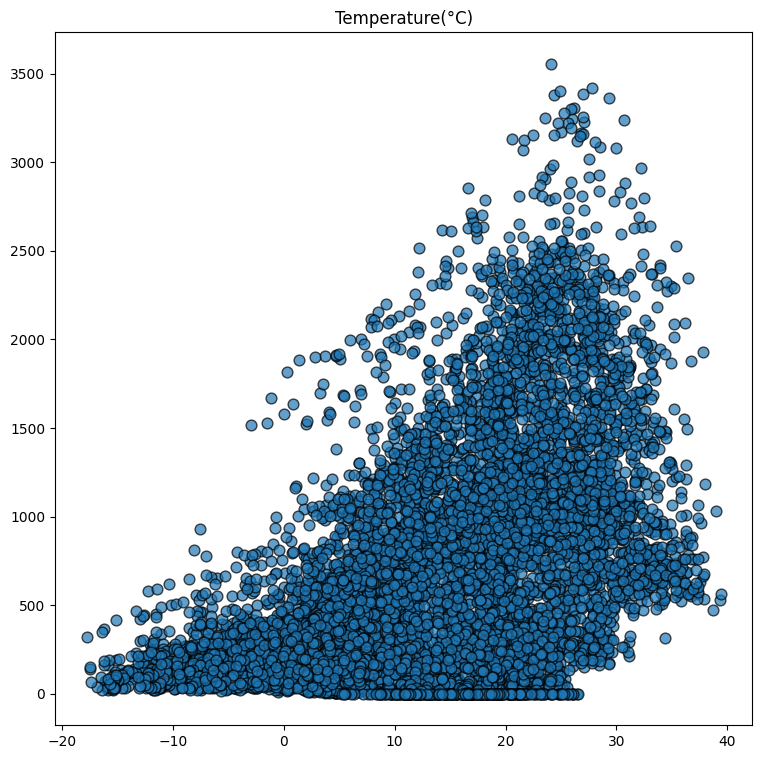

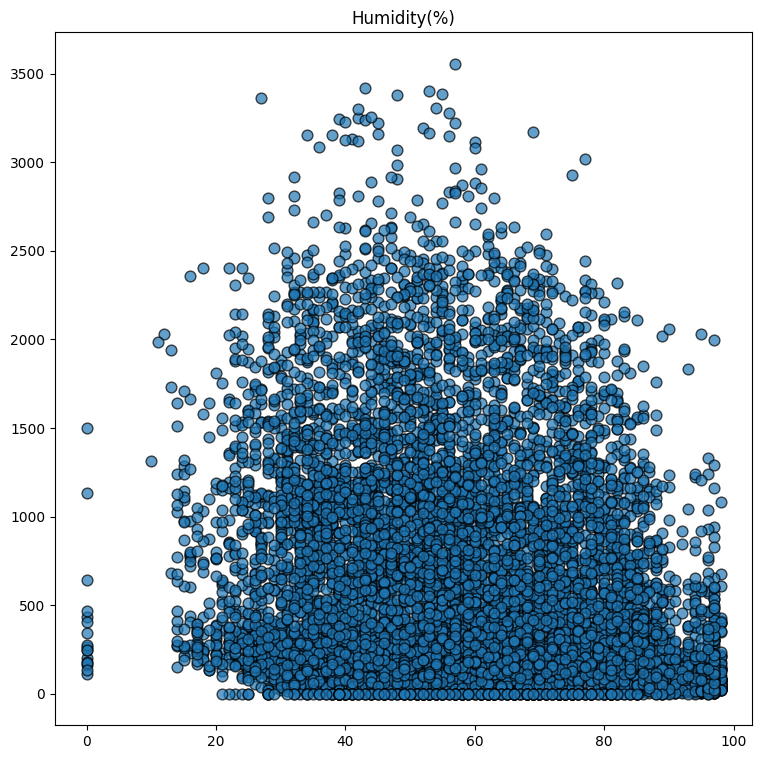

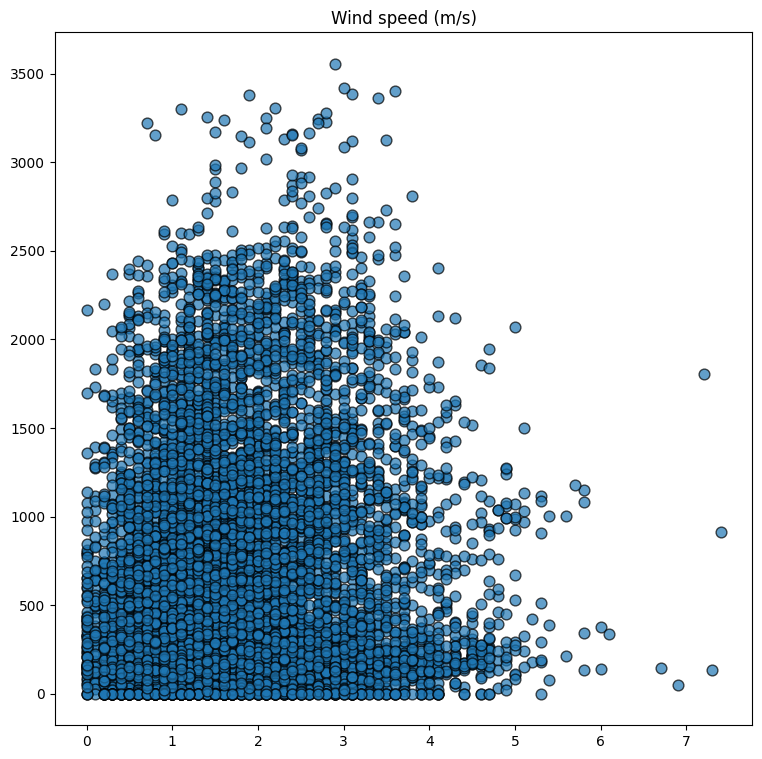

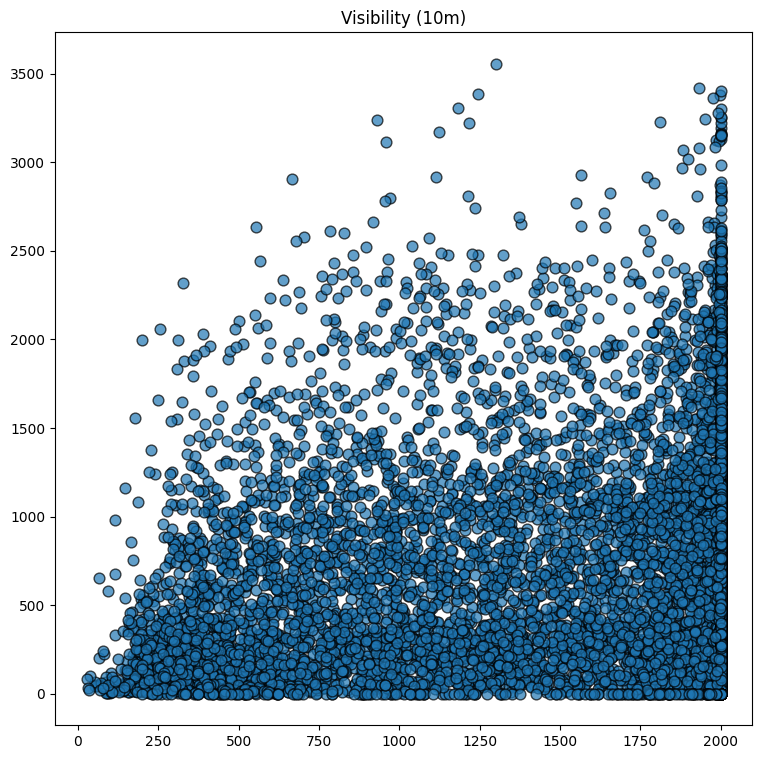

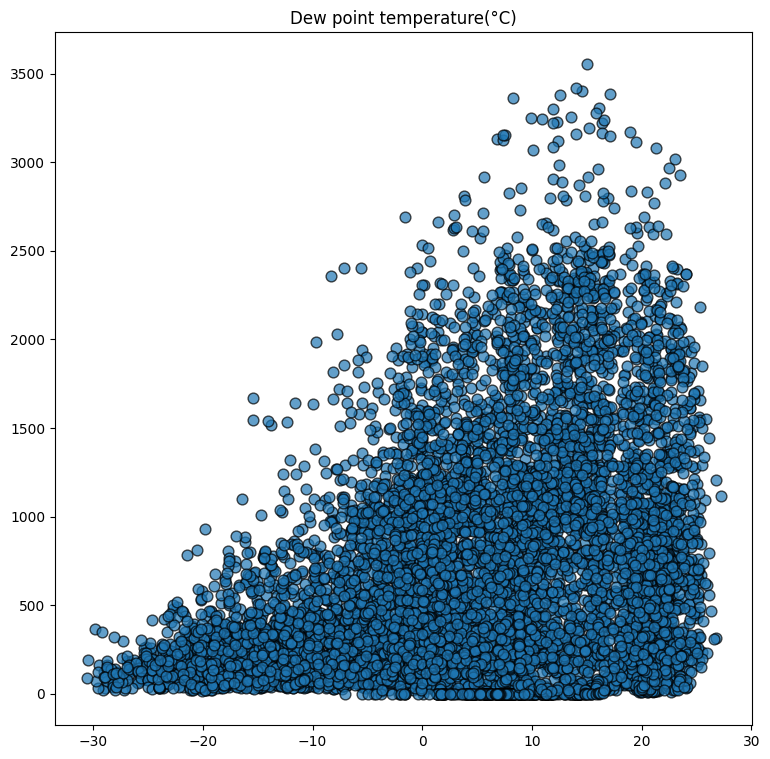

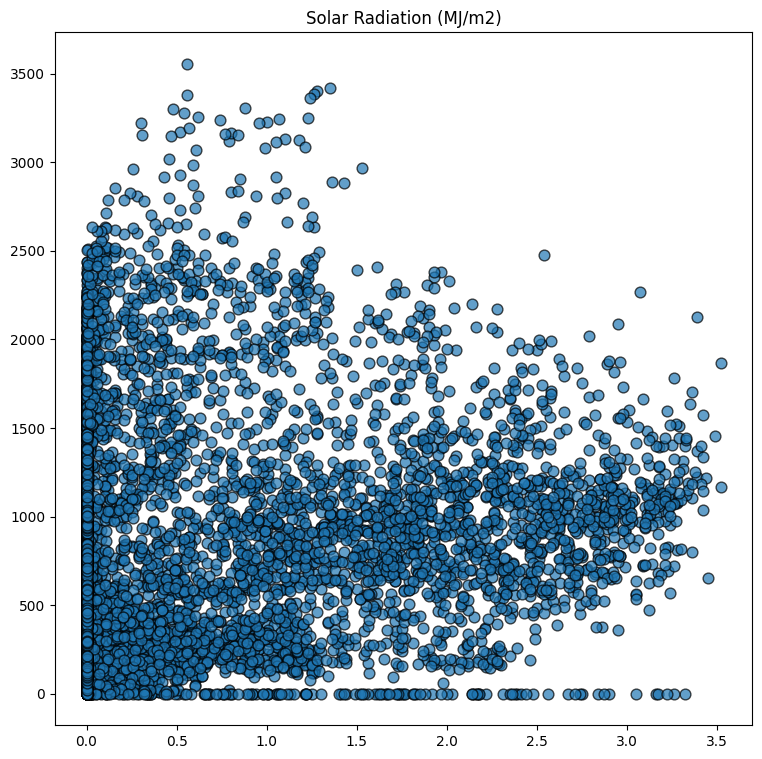

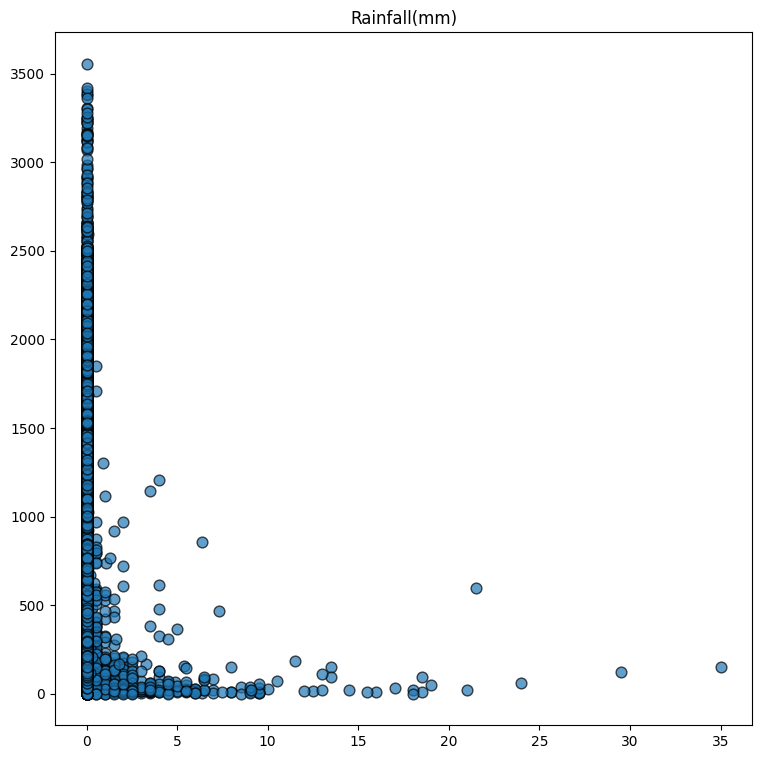

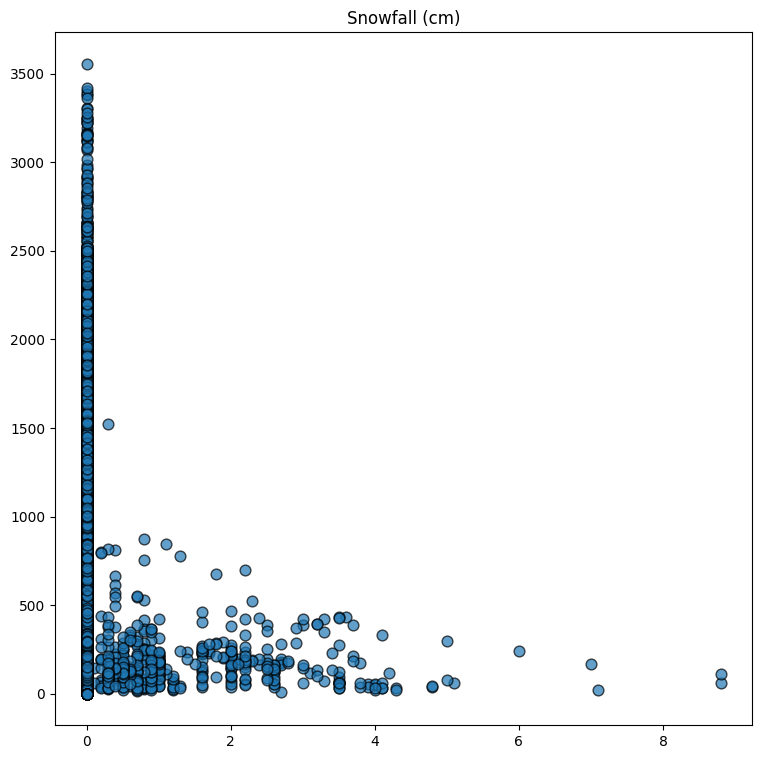

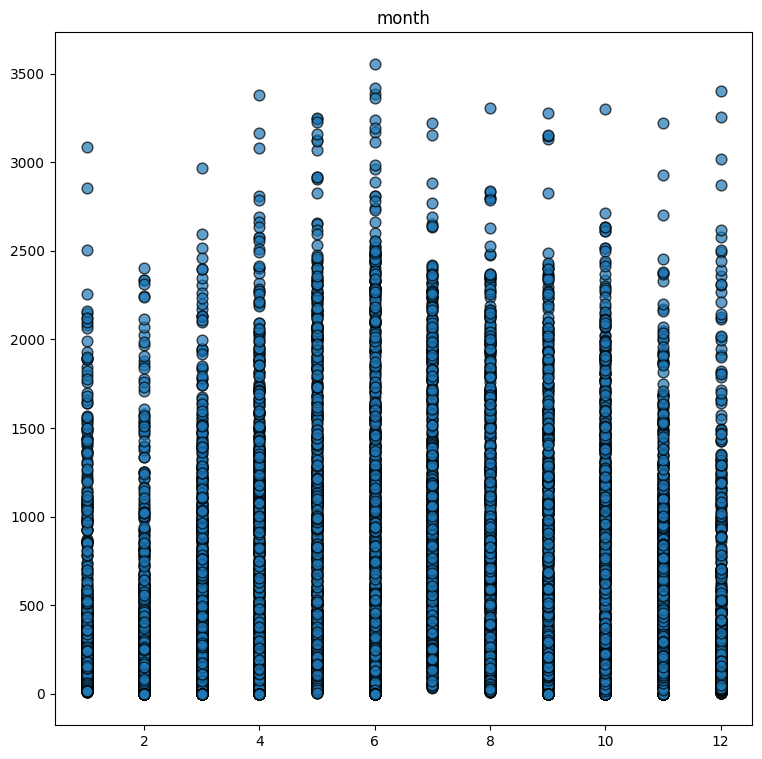

In [32]:
for i in numfeature[1:-1]:
  x = df[i]
  y = df['Rented Bike Count']
  fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
  ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)

# Create sequence of 100 numbers from 0 to 100 
  xseq = np.linspace(0, 10, num=100)

# Plot regression line
  ax.plot( color="k", lw=2.5)
  ax.set_title(i)
plt.show()

In [33]:
correlation=df.corr()

<ipython-input-33-0c9b4bd1cb53>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


In [34]:

sns.heatmap(correlation, annot=True, annot_kws={"size": 7})

<Axes: >

In [35]:
# Calculating VIF
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [36]:
numfeature

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'weekdays_weekend'],
      dtype='object')

In [37]:
calc_vif(df[[i for i in numfeature if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

variables       VIF
0                     Hour  3.961874
1          Temperature(°C)  3.236809
2              Humidity(%)  6.114153
3         Wind speed (m/s)  4.616621
4         Visibility (10m)  5.404128
5  Solar Radiation (MJ/m2)  2.272068
6             Rainfall(mm)  1.081252
7            Snowfall (cm)  1.125304
8                    month  4.580307
9         weekdays_weekend  1.399708

In [38]:
numfeature=[ 'Hour', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'weekdays_weekend']

## **Lable Encoding for categorical data ***

In [39]:
catgfeature=df.describe(include=['object','category']).columns

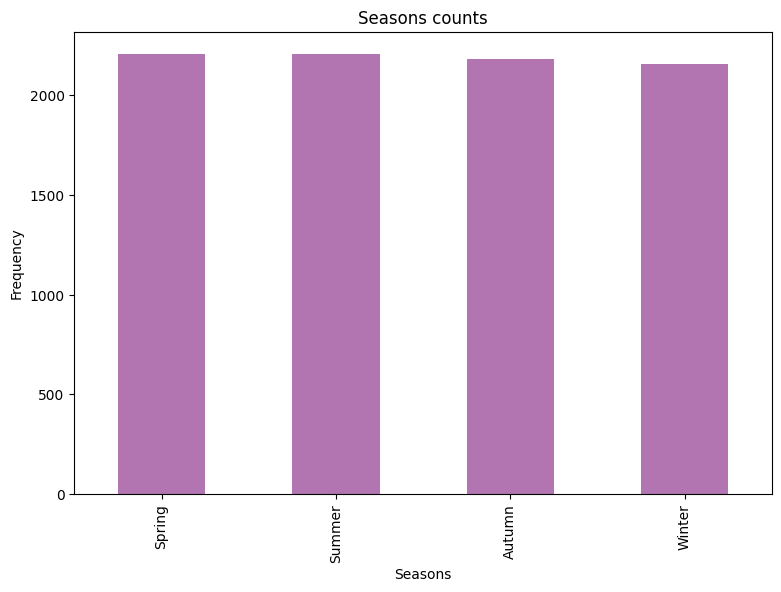

In [40]:
# Bar plot
for i in catgfeature:
    counts =df[i].value_counts()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color= (0.5,0.1,0.5,0.6))
    ax.set_title(i + ' counts')
    ax.set_xlabel(i) 
    ax.set_ylabel("Frequency")
plt.show()

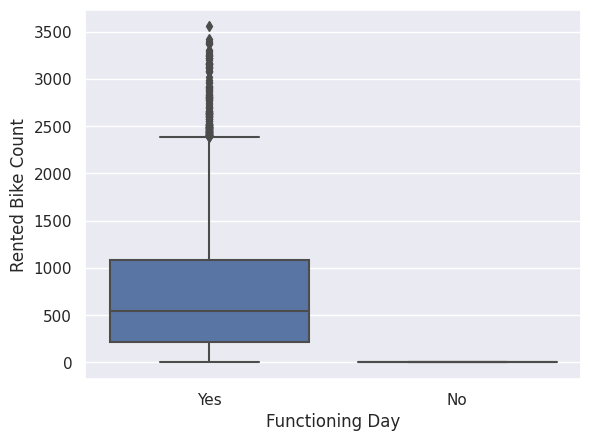

In [41]:
# Box plot
for i in catgfeature:
  sns.set(style="darkgrid")

  sns.boxplot(x=df[i],y=df['Rented Bike Count'])
  plt.show()

In [42]:
catgfeature

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [43]:
# Lable Encoding
encode={'Holiday':{'Holiday':1,'No Holiday':0},'Functioning Day':{'Yes':1,'No':0}}
df= df.replace(encode)

### **hot encoding**

In [44]:
df= pd.get_dummies(df, columns=["Seasons"], prefix=["season"])

In [45]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'month', 'weekdays_weekend', 'season_Autumn',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

In [46]:
features = numfeature.copy()
features.extend(['season_Autumn',
       'season_Spring', 'season_Summer', 'season_Winter', 'Holiday', 'Functioning Day'])

## **Model Implementation**

In [47]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Holiday  Functioning Day  month  \
0           0.0            0.0        0                1      1   
1           0.0            0.0        0                1      1   
2           0.0            0.0        0                1      1   
3           0.0            0.0        0                1      1   
4           0.0            0.0        0                1      1   

   weekdays_weekend  season_Autumn  season_Spring  season_Summer  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   

   season_Winter  
0              1  
1              1  
2              1  
3              1  
4              1

In [48]:
X = df[features]
Y = np.sqrt(df['Rented Bike Count'])

In [49]:
X.head()

Hour  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0     0           37               2.2              2000   
1     1           38               0.8              2000   
2     2           39               1.0              2000   
3     3           40               0.9              2000   
4     4           36               2.3              2000   

   Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0                      -17.6                      0.0           0.0   
1                      -17.6                      0.0           0.0   
2                      -17.7                      0.0           0.0   
3                      -17.6                      0.0           0.0   
4                      -18.6                      0.0           0.0   

   Snowfall (cm)  month  weekdays_weekend  season_Autumn  season_Spring  \
0            0.0      1                 0              0              0   
1            0.0      1                 0              0              0   
2            0.0      1                 0              0              0   
3            0.0      1                 0              0              0   
4            0.0      1                 0              0              0   

   season_Summer  season_Winter  Holiday  Functioning Day  
0              0              1        0                1  
1              0              1        0                1  
2              0              1        0                1  
3              0              1        0                1  
4              0              1        0                1

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split( X,Y, test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(7008, 16)
(1752, 16)


In [51]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## **Modelling:**
### These are the columns that i kept for modelling [Hour	,Humidity(%)	,Wind speed (m/s),	Visibility (10m),	Dew point temperature(°C)	,Solar Radiation (MJ/m2)	Rainfall(mm),	Snowfall (cm),	month	weekdays_weekend,	season_Autumn	,season_Spring,	season_Summer	,season_Winter,	Holiday	Functioning Day] and outcome veriable is ['Rented Bike Count']

### Ill be using 
### 1)LinearRegression

###2)random forest

###3)Lasso regression 

###4)Ridge regression 

###5)Elasticnet regression

###6)Support Vector Regression

###7) Bayesian regression

###8)Dicision Tree regression

###9)Random Forest regression 

###10)Extra-Trees regression
     

## **HYPERPARAMETER TUNING**

In [52]:
lasso = Lasso()
alphaslasso= {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, alphaslasso, cv=3)
lasso_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.629e+04, tolerance: 7.250e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.481e+03, tolerance: 7.234e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.722e+04, tolerance: 7.147e

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]})

In [53]:
print('best alpha :-', lasso_regressor.best_params_)

best alpha :- {'alpha': 0.01}


In [54]:
ridge = Ridge()
alphasRidge= {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, alphasRidge, cv=3)
ridge_regressor.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]})

In [55]:
print('best alpha :-', ridge_regressor.best_params_)

best alpha :- {'alpha': 5}


In [56]:
elastic = ElasticNet()
alphaselastic = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10],'l1_ratio':[0.3,0.4,0.5]}
elastic_regressor = GridSearchCV(elastic,alphaselastic, cv=3)
elastic_regressor.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.875e+04, tolerance: 7.250e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.638e+04, tolerance: 7.234e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.537e+04, tolerance: 7.147e

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10],
                         'l1_ratio': [0.3, 0.4, 0.5]})

In [57]:
print('best alpha :-', elastic_regressor.best_params_)

best alpha :- {'alpha': 0.001, 'l1_ratio': 0.3}


In [58]:
parameter_rf={
 'max_depth': [20,40],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [600,800]}

In [59]:
rf = RandomForestRegressor()
randomforest_regressor = GridSearchCV(rf,parameter_rf)
randomforest_regressor.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 40], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [600, 800]})

In [60]:
print('best params :-',randomforest_regressor.best_params_)

best params :- {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}


In [61]:
et = ExtraTreesRegressor()
extratrees_regressor = GridSearchCV(et,parameter_rf)
extratrees_regressor.fit(X_train, Y_train)

GridSearchCV(estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [20, 40], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [600, 800]})

In [62]:
print('best params :-',extratrees_regressor.best_params_)

best params :- {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 800}


## **Implementing Linear Regression**

In [63]:
linearreg = LinearRegression()
linearreg.fit(X_train, Y_train)

LinearRegression()

In [64]:
linearreg.score(X_train, Y_train)

0.6551531736732898

In [65]:
Y_predlr=linearreg.predict(X_test)
print('R2 Score:- ', r2_score((Y_test)*(Y_test),(Y_predlr)*(Y_predlr)))
print('RMSE:- ',math.sqrt(mean_squared_error((Y_test)*(Y_test),(Y_predlr)*(Y_predlr))))

R2 Score:-  0.5812438693609576
RMSE:-  418.6393432612163


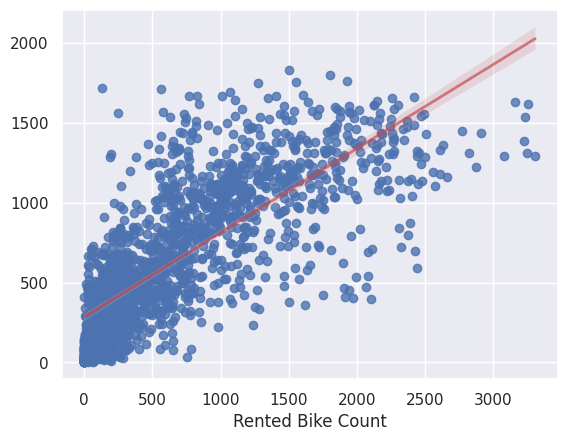

In [66]:
sns.regplot(x=(Y_test)*(Y_test), y=(Y_predlr)*(Y_predlr), line_kws={"color":"r","alpha":0.7,"lw":2})
plt.show()

## **Implementing Lasso Regression**

In [67]:
lassoreg=Lasso(alpha=0.01,max_iter=1000)
lassoreg.fit(X_train, Y_train)

Lasso(alpha=0.01)

In [68]:
lassoreg.score(X_train, Y_train)

0.6551312963275853

In [69]:
Y_predlassor=lassoreg.predict(X_test)
print('R2 Score:- ', r2_score((Y_test)*(Y_test),(Y_predlassor)*(Y_predlassor)))
print('RMSE:- ',math.sqrt(mean_squared_error((Y_test)*(Y_test),(Y_predlassor)*(Y_predlassor))))

R2 Score:-  0.5804267384231936
RMSE:-  419.0475957231609


In [70]:
sns.regplot(x=(Y_test)*(Y_test), y=(Y_predlassor)*(Y_predlassor), line_kws={"color":"r","alpha":0.7,"lw":2})
plt.show()

## **Implementing Ridge Regression**

In [71]:
ridgereg=Ridge(alpha=5)
ridgereg.fit(X_train, Y_train)

Ridge(alpha=5)

In [72]:
ridgereg.score(X_train, Y_train)

0.65515113060582

In [73]:
Y_predridge=ridgereg.predict(X_test)
print('R2 Score:- ', r2_score((Y_test)*(Y_test),(Y_predridge)*(Y_predridge)))
print('RMSE:- ',math.sqrt(mean_squared_error((Y_test)*(Y_test),(Y_predridge)*(Y_predridge))))

R2 Score:-  0.581073748955476
RMSE:-  418.724371106619


In [74]:
sns.regplot(x=(Y_test)*(Y_test), y=(Y_predridge)*(Y_predridge), line_kws={"color":"r","alpha":0.7,"lw":2})
plt.show()

## **Implementing ElasticNet Regression**

In [75]:
elasticreg=ElasticNet(alpha=0.01,l1_ratio= 0.3)
elasticreg.fit(X_train, Y_train)

ElasticNet(alpha=0.01, l1_ratio=0.3)

In [76]:
elasticreg.score(X_train, Y_train)

0.6549565796313148

In [77]:
Y_predelastic=elasticreg.predict(X_test)
print('R2 Score:- ', r2_score((Y_test)*(Y_test),(Y_predelastic)*(Y_predelastic)))
print('RMSE:- ',math.sqrt(mean_squared_error((Y_test)*(Y_test),(Y_predelastic)*(Y_predelastic))))

R2 Score:-  0.5791782636682741
RMSE:-  419.67058792273076


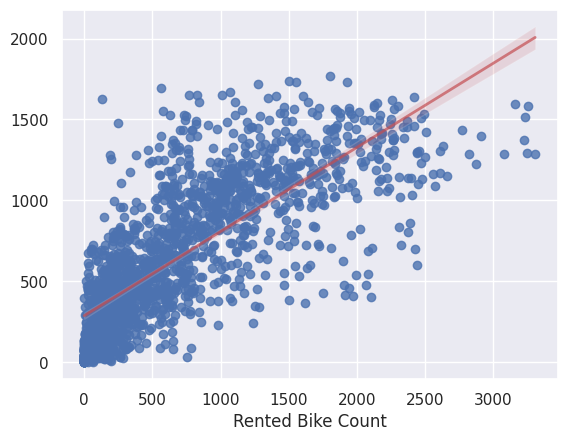

In [78]:
sns.regplot(x=(Y_test)*(Y_test), y=(Y_predelastic)*(Y_predelastic), line_kws={"color":"r","alpha":0.7,"lw":2})
plt.show()

## **Implementing Support Vector Regression**

In [79]:
svrr= SVR(kernel = 'rbf')
svrr.fit(X_train, Y_train)

SVR()

In [80]:
svrr.score(X_train, Y_train)

0.7723902126381459

In [81]:
Y_predsvr=svrr.predict(X_test)
print('R2 Score:- ', r2_score((Y_test)*(Y_test),(Y_predsvr)*(Y_predsvr)))
print('RMSE:- ',math.sqrt(mean_squared_error((Y_test)*(Y_test),(Y_predsvr)*(Y_predsvr))))

R2 Score:-  0.714890852621938
RMSE:-  345.43395657155804


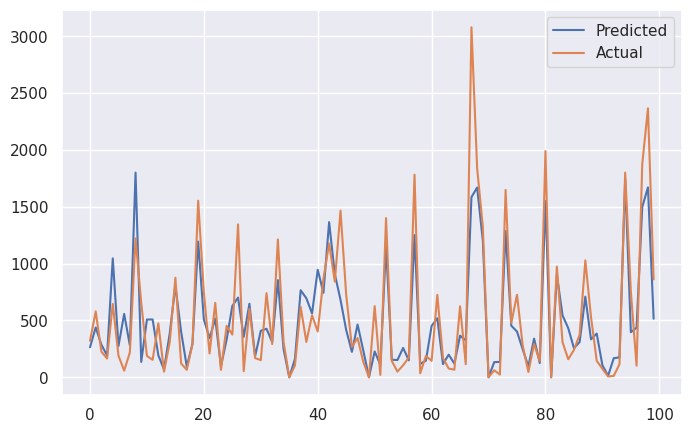

In [82]:
plt.figure(figsize=(8,5))
plt.plot((Y_predsvr[:100])**2)
plt.plot((np.array(Y_test)[:100])**2)
plt.legend(["Predicted","Actual"])
plt.show()

## **Implementing Bayesian Regression**


In [83]:
bayreg=BayesianRidge()
bayreg.fit(X_train, Y_train)

BayesianRidge()

In [84]:
bayreg.score(X_train, Y_train)

0.6551498431289278

In [85]:
Y_predbay=bayreg.predict(X_test)
print('R2 Score:- ', r2_score((Y_test)*(Y_test),(Y_predbay)*(Y_predbay)))
print('RMSE:- ',math.sqrt(mean_squared_error((Y_test)*(Y_test),(Y_predbay)*(Y_predbay))))

R2 Score:-  0.5810255467951426
RMSE:-  418.74845987961004


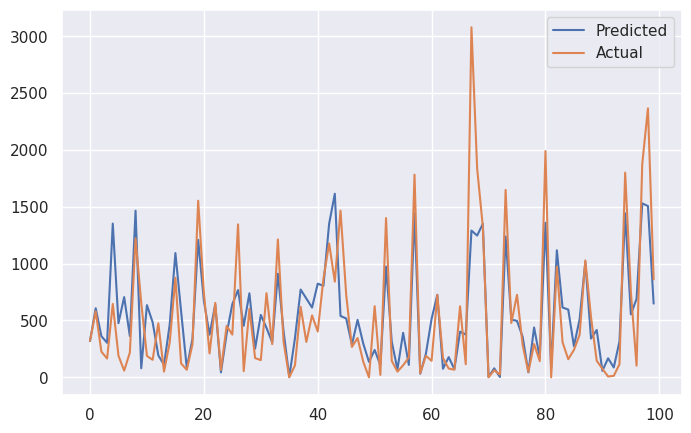

In [86]:
plt.figure(figsize=(8,5))
plt.plot((Y_predbay[:100])**2)
plt.plot((np.array(Y_test)[:100])**2)
plt.legend(["Predicted","Actual"])
plt.show()

# **Implementing Decision Tree Regression ***

In [87]:
dtreg = DecisionTreeRegressor(random_state = 0) 
dtreg.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [88]:
dtreg.score(X_train, Y_train)

1.0

In [89]:
Y_preddt=dtreg.predict(X_test)
print('R2 Score:- ', r2_score((Y_test)*(Y_test),(Y_preddt)*(Y_preddt)))
print('RMSE:- ',math.sqrt(mean_squared_error((Y_test)*(Y_test),(Y_preddt)*(Y_preddt))))

R2 Score:-  0.7798718754799039
RMSE:-  303.52692214324816


## **Feature Importances**

In [90]:
importancesDecisionTree  = dtreg.feature_importances_

In [91]:
importancesDecisionTreedict={'features':list(X.columns),'features importances':importancesDecisionTree}
importancesDecisionTreedf=pd.DataFrame(importancesDecisionTreedict)

<ipython-input-92-4679ba6a3daf>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


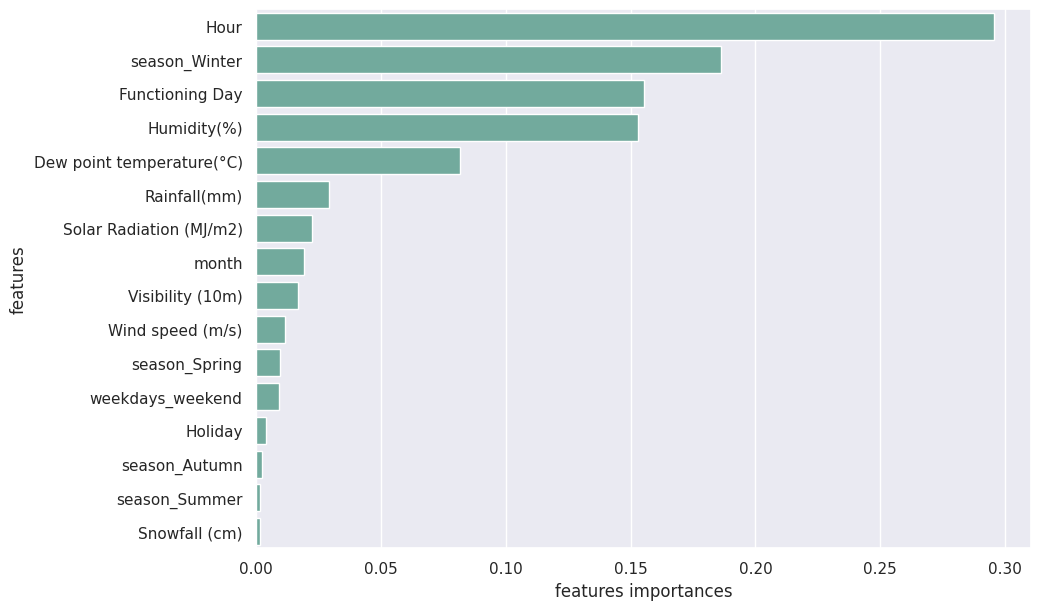

In [92]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# load dataset
tips = importancesDecisionTreedf.sort_values(['features importances'], ascending=False).reset_index(drop=True)

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x='features importances', 
    y='features', 
    data=tips, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

## **Implementing RandomForest Regression**

In [93]:
rfreg = RandomForestRegressor(max_depth=40, min_samples_leaf= 1, min_samples_split= 2, n_estimators=800)
rfreg.fit(X_train, Y_train)

RandomForestRegressor(max_depth=40, n_estimators=800)

In [94]:
rfreg.score(X_train, Y_train)

0.9886207520006969

In [95]:
Y_predrf=rfreg.predict(X_test)
print('R2 Score:- ', r2_score((Y_test)*(Y_test),(Y_predrf)*(Y_predrf)))
print('RMSE:- ',math.sqrt(mean_squared_error((Y_test)*(Y_test),(Y_predrf)*(Y_predrf))))

R2 Score:-  0.8862631389497259
RMSE:-  218.1775549625446


In [96]:
plt.figure(figsize=(8,5))
plt.plot((Y_predrf[:100])**2)
plt.plot((np.array(Y_test)[:100])**2)
plt.legend(["Predicted","Actual"])
plt.show()

## **Feature Importances**

In [97]:
importancesRandomForest = rfreg.feature_importances_

In [98]:
importancesRandomForestdict={'features':list(X.columns),'features importances':importancesRandomForest}
importancesRandomForestdf=pd.DataFrame(importancesRandomForestdict)

In [99]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# load dataset
tips = importancesRandomForestdf.sort_values(['features importances'], ascending=False).reset_index(drop=True)

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x='features importances', 
    y='features', 
    data=tips, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

<ipython-input-99-0c3203ef12d8>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


## **Implementing Extra-trees regression**

In [100]:
etreg = ExtraTreesRegressor(max_depth=40, min_samples_leaf= 1, min_samples_split= 2, n_estimators=600)
etreg.fit(X_train, Y_train)

ExtraTreesRegressor(max_depth=40, n_estimators=600)

In [101]:
etreg.score(X_train, Y_train)

1.0

In [102]:
Y_predet=etreg.predict(X_test)
print('R2 Score:- ', r2_score((Y_test)*(Y_test),(Y_predet)*(Y_predet)))
print('RMSE:- ',math.sqrt(mean_squared_error((Y_test)*(Y_test),(Y_predet)*(Y_predet))))

R2 Score:-  0.9068507924450411
RMSE:-  197.4463153831275


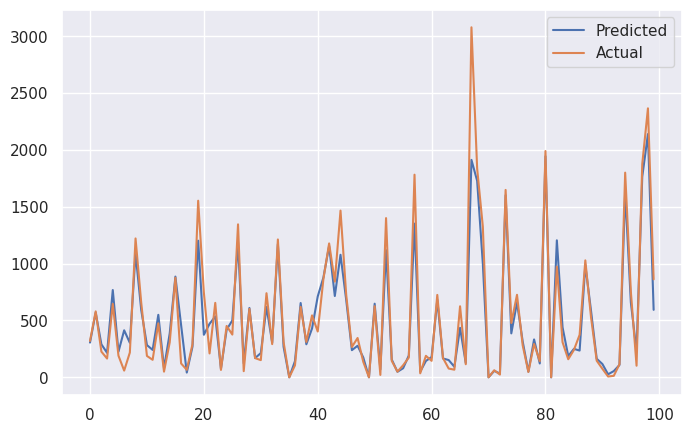

In [103]:
plt.figure(figsize=(8,5))
plt.plot((Y_predet[:100])**2)
plt.plot((np.array(Y_test)[:100])**2)
plt.legend(["Predicted","Actual"])
plt.show()

## **Feature Importances**

In [104]:
importancesExtratree = etreg.feature_importances_

In [105]:
importancesExtratreedict={'features':list(X.columns),'features importances':importancesExtratree}
importancesExtratreedf=pd.DataFrame(importancesExtratreedict)

<ipython-input-106-bc7b45ad6bde>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


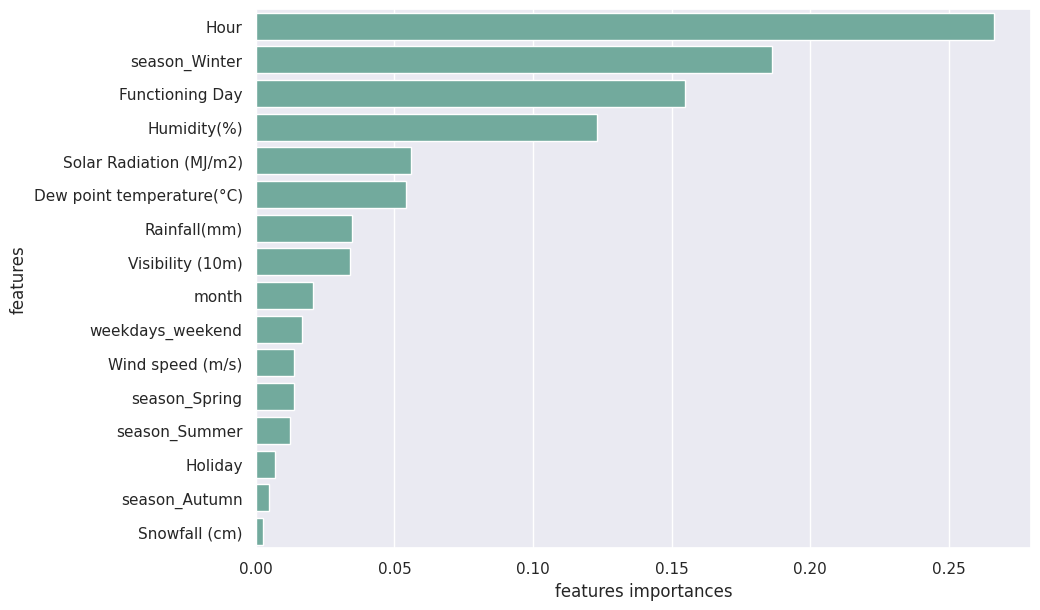

In [106]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# load dataset
tips = importancesExtratreedf.sort_values(['features importances'], ascending=False).reset_index(drop=True)

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x='features importances', 
    y='features', 
    data=tips, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

In [107]:
model=['linear','Lasso ',
       'Ridge ','Elasticnet ','Support Vector ',
       'Bayesian ','Decision ','Random Forest ','Exta-Trees']
trainingscore=[linearreg.score(X_train, Y_train),lassoreg.score(X_train, Y_train),
               ridgereg.score(X_train, Y_train),elasticreg.score(X_train, Y_train),svrr.score(X_train, Y_train),
               bayreg.score(X_train, Y_train),dtreg.score(X_train, Y_train),rfreg.score(X_train, Y_train),etreg.score(X_train, Y_train)]
testingscore=[r2_score((Y_test)*(Y_test),(Y_predlr)*(Y_predlr)),r2_score((Y_test)*(Y_test),(Y_predlassor)*(Y_predlassor)),
             r2_score((Y_test)*(Y_test),(Y_predridge)*(Y_predridge)),r2_score((Y_test)*(Y_test),(Y_predelastic)*(Y_predelastic)),
             r2_score((Y_test)*(Y_test),(Y_predsvr)*(Y_predsvr)),r2_score((Y_test)*(Y_test),(Y_predbay)*(Y_predbay)),
             r2_score((Y_test)*(Y_test),(Y_preddt)*(Y_preddt)),r2_score((Y_test)*(Y_test),(Y_predrf)*(Y_predrf)),r2_score((Y_test)*(Y_test),(Y_predet)*(Y_predet))]       
randomsqe=[math.sqrt(mean_squared_error((Y_test)*(Y_test),(Y_predlr)*(Y_predlr))),math.sqrt(mean_squared_error((Y_test)*(Y_test),(Y_predlassor)*(Y_predlassor))),
          math.sqrt(mean_squared_error((Y_test)*(Y_test),(Y_predridge)*(Y_predridge))),math.sqrt(mean_squared_error((Y_test)*(Y_test),(Y_predelastic)*(Y_predelastic))),
          math.sqrt(mean_squared_error((Y_test)*(Y_test),(Y_predsvr)*(Y_predsvr))),math.sqrt(mean_squared_error((Y_test)*(Y_test),(Y_predbay)*(Y_predbay))),
          math.sqrt(mean_squared_error((Y_test)*(Y_test),(Y_preddt)*(Y_preddt))),math.sqrt(mean_squared_error((Y_test)*(Y_test),(Y_predrf)*(Y_predrf))),
           math.sqrt(mean_squared_error((Y_test)*(Y_test),(Y_predet)*(Y_predet)))]                                                                               

# **conclusion**:-

In [108]:
conclusiondict={'Machine Learning Model':model,'Training Score':trainingscore,'Testing Score':testingscore,'Root Mean Squre Error':randomsqe}

In [109]:
Conclusion=pd.DataFrame(conclusiondict).set_index('Machine Learning Model')

In [110]:
con1=Conclusion.copy()
con1.drop(['Root Mean Squre Error'],axis=1,inplace=True)

Text(0.5, 0, 'Model')

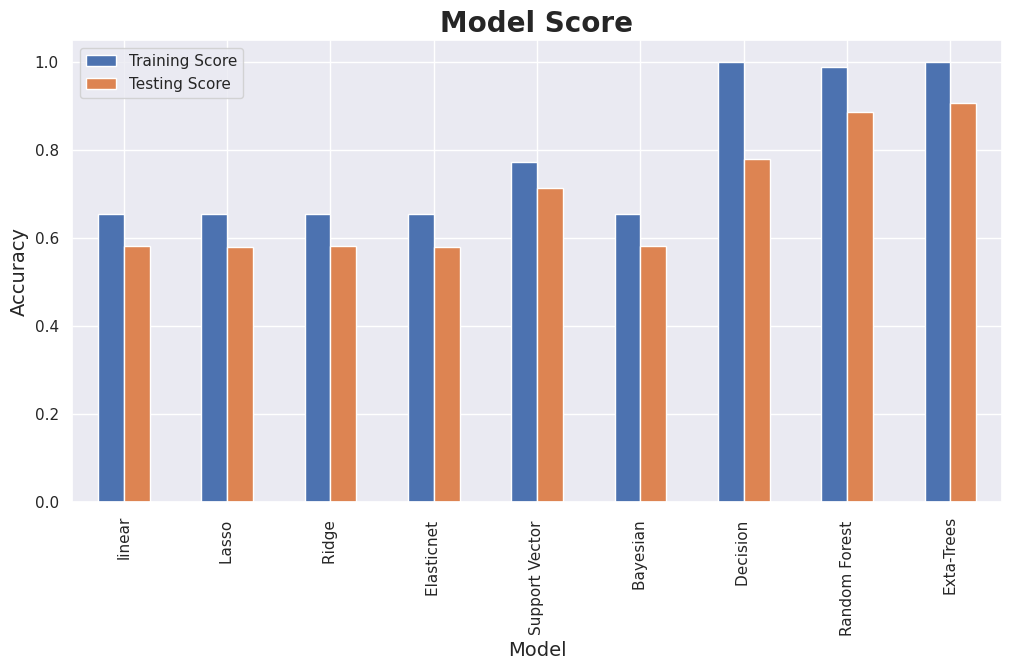

In [113]:
con1.plot.bar(figsize=(12,6))
plt.title('Model Score',fontweight="bold", size=20)
plt.ylabel("Accuracy",size=14)
plt.xlabel("Model",size=14)

In [112]:
Conclusion

Training Score  Testing Score  Root Mean Squre Error
Machine Learning Model                                                      
linear                        0.655153       0.581244             418.639343
Lasso                         0.655131       0.580427             419.047596
Ridge                         0.655151       0.581074             418.724371
Elasticnet                    0.654957       0.579178             419.670588
Support Vector                0.772390       0.714891             345.433957
Bayesian                      0.655150       0.581026             418.748460
Decision                      1.000000       0.779872             303.526922
Random Forest                 0.988621       0.886263             218.177555
Exta-Trees                    1.000000       0.906851             197.446315

## **Final Conclusion**

##* From above its clear that extra-tree regression model is the best model for this dataset.

## * Elasticnet regularization performed very poorly.

## * Random forest model also gives better results compared to other models

## * random forest and extra-trees model gives less random mean squer error compare to other models.